In [1]:
from pylab import *
import numpy as np
from PIL import Image

In [2]:
array(Image.open('datasets/digit/0.png').convert('L'))

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [3]:
def convert_image2bw(image):
    
    bw_image = image.copy()
    
    for i, row in enumerate(bw_image):
        for j, value in enumerate(row):
            if bw_image[i][j] <= 127:
                bw_image[i][j] = 0
            else:
                bw_image[i][j] = 255
    return bw_image

In [4]:
result = convert_image2bw(array(Image.open('datasets/digit/0.png').convert('L')))

In [5]:
result[25]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255], dtype=uint8)

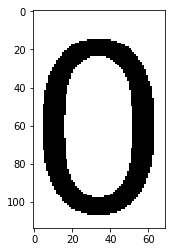

In [6]:
imshow(result, cmap="gray")

In [7]:
# Algorithm can be seen here: https://rosettacode.org/wiki/Zhang-Suen_thinning_algorithm
# |P9|P2|P3| 
# |P8|P1|P4| 
# |P7|P6|P5| 

class ImageThinner:
    
    def __init__(self):
        self.X_TRANSLATION = [0, 1, 1, 1, 0, -1, -1, -1]
        self.Y_TRANSLATION = [-1, -1, 0, 1, 1, 1, 0, -1]


    def neighbors(self, image, x, y):
        """
        Param: image is represented in array
        Return neighbors of a pixel 
        """
        result = []
        for i in range(len(self.X_TRANSLATION)):
            result.append(image[y + self.Y_TRANSLATION[i]][x + self.X_TRANSLATION[i]])
        return result

    def transitions(self, neighbors):
        """
        The number of transitions from white to black in a sequence of
        P2, P3, P4, P5, P6, P7, P8, P9, P2
        """
        neighbors_check = neighbors + neighbors[0:1]
        result = 0
            
        for i in range(len(neighbors_check) - 1):
            if neighbors_check[i] > 127 and neighbors_check[i + 1] <= 127:
                result += 1
        
        return result

    def count_black_pixel(self, neighbors):
        """
        The number of black pixel neighbors
        """
        result = 0
        for i in neighbors:
            if i <= 127:
                result += 1
        
        return result

    def thin_image(self, image):
        """
        Thin the image
        """
        
        thinned_image = image.copy()

        list_of_change_1 = list_of_change_2 = 1

        while list_of_change_1 or list_of_change_2:
            rows, column = thinned_image.shape

            # First Condition
            list_of_change_1 = []
            for y in range(1, rows - 1):
                for x in range(1, column - 1):
                    P2, P3, P4, P5, P6, P7, P8, P9 = neighbors_list = self.neighbors(thinned_image, x, y)

                    
                    if (thinned_image[y][x] <= 127 and
                        2 <= self.count_black_pixel(neighbors_list) <= 6 and
                        self.transitions(neighbors_list) == 1 and
                        (P2 > 127 or P4 > 127 or P6 > 127) and
                        (P4 > 127 or P6 > 127 or P8 > 127)):
                        
                        list_of_change_1.append((y, x))

            for y, x in list_of_change_1:
                thinned_image[y][x] = 255                

            # Second Condition
            list_of_change_2 = []
            for y in range(1, rows - 1):
                for x in range(1, column - 1):
                    P2, P3, P4, P5, P6, P7, P8, P9 = neighbors_list = self.neighbors(thinned_image, x, y)

                    if (thinned_image[y][x] <= 127 and
                        2 <= self.count_black_pixel(neighbors_list) <= 6 and
                        self.transitions(neighbors_list) == 1 and
                        (P2 > 127 or P4 > 127 or P8 > 127) and
                        (P2 > 127 or P6 > 127 or P8 > 127)):
                        
                        list_of_change_2.append((y, x))

            for y, x in list_of_change_2:
                thinned_image[y][x] = 255


        return thinned_image

In [8]:
image_thinner = ImageThinner()

In [9]:
result = image_thinner.thin_image(convert_image2bw(array(Image.open('datasets/digit/3.png').convert('L'))))
result

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

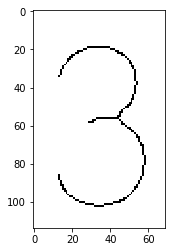

In [10]:
imshow(result, cmap="gray")